<a href="https://colab.research.google.com/github/mrstask/dtp_statistics_kyiv/blob/master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%94%D0%A2%D0%9F_%D0%9A%D0%B8%D1%97%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install requests-html

In [1]:
from requests_html import HTMLSession
session = HTMLSession()

r = session.get('https://kyivcity.gov.ua/dorohy_transport_ta_parkovky/dorozhniy_rukh_377411/dtp_statistika_ta_analiz_379515/')
parsed_data = r.html.xpath('//p')

In [2]:
raw_data = []
for p in parsed_data:
  raw_data.append(p.text)
raw_data = ' '.join(raw_data)
raw_data = raw_data.strip().replace('\n', '')
#print(raw_data)

In [3]:
import re
filtered_data = []
dates = re.compile(r'\d{2}\.\d{2}.\d{4}').findall(raw_data)
#print(dates)

In [4]:
for d in dates:
  print(d)
  raw_data = raw_data.replace(d, f'|{d}\/')
#print(raw_data)

13.07.2020
06.07.2020
30.06.2020
22.06.2020
15.06.2020
09.06.2020
01.06.2020
25.05.2020
18.05.2020
12.05.2020
04.05.2020
27.04.2020
21.04.2020
13.04.2020
06.04.2020
30.03.2020
23.03.2020
16.03.2020
10.03.2020
02.03.2020
24.02.2020
17.02.2020
10.02.2020
06.01.2020
03.02.2020
27.01.2020
20.01.2020
13.01.2020
06.01.2020
02.01.2020
23.12.2019
16.12.2019
09.12.2019
02.12.2019
25.11.2019
11.11.2019
04.11.2019
28.10.2019
21.10.2019
15.10.2019
07.10.2019
30.09.2019
23.09.2019
16.09.2019
09.09.2019
02.09.2019
27.08.2019
19.08.2019
12.08.2019
05.08.2019
29.07.2019
22.07.2019
15.07.2019
08.07.2019
01.07.2019
24.06.2019
18.06.2019
10.06.2019
04.06.2019
26.05.2019


In [5]:
data_list = raw_data.split('|')
res_list = []
for item in data_list:
    if data_list:
        res_list.append(item.split('\/'))


In [6]:
data_dict = {}
for item in res_list:
    if len(item) >= 2:
        data_dict[item[0]] = item[1] if item[1] else item[2]

In [7]:
dict_of_dicts = {}
for key, value in data_dict.items():
    dict_of_dicts[key] = {'text': value.replace(u'\xa0', u' ')}
#dict_of_dicts

In [8]:
for key, value in dict_of_dicts.items():
    raw_string = dict_of_dicts[key]['text']
    value = re.search(r'\d{1,4} (ДТП|ДОРОЖНЬО|дорожньо)', raw_string).group(0)
    dict_of_dicts[key]['accidents'] = re.findall(r'\d{1,4}', value)[0]

In [10]:
for key, value in dict_of_dicts.items():
    raw_string = dict_of_dicts[key]['text']
    value = re.search(r'\d{1,3} (із|з) них', raw_string)
    #print(key, value)
    #if value:
    #    value = value.group(0)
    #    dict_of_dicts[key]['victims'] = re.findall(r'\d{1,4}', value)[0]
    #else:
    #    value = re.search(r'Із них \d{1,3} ', raw_string)
    if value:
        value = value.group(0)
        dict_of_dicts[key]['victims'] = re.findall(r'\d{1,4}', value)[0]
    else:
        dict_of_dicts[key]['victims'] = 0
#print(dict_of_dicts)

In [11]:
!pip3 install seaborn

In [53]:
import numpy as np
import pandas as pd

dates = list(dict_of_dicts.keys())
date_of = np.array(dates)
accidents = np.array([value['accidents'] for value in dict_of_dicts.values()])
victims = np.array([value['victims'] for value in dict_of_dicts.values()])

# convert to pandas dataframe
d = {'date_of': date_of, 'accidents': pd.to_numeric(accidents), 'victims': pd.to_numeric(victims)}
pdnumsqr = pd.DataFrame(d)
pdnumsqr['date_of'] = pd.to_datetime(pdnumsqr['date_of'])
pdnumsqr = pdnumsqr.sort_values('date_of')

In [54]:
pdnumsqr.head()

,date_of,accidents,victims
53,2019-01-07,775,0
44,2019-02-09,698,54
32,2019-02-12,847,37
57,2019-04-06,820,0
35,2019-04-11,832,0


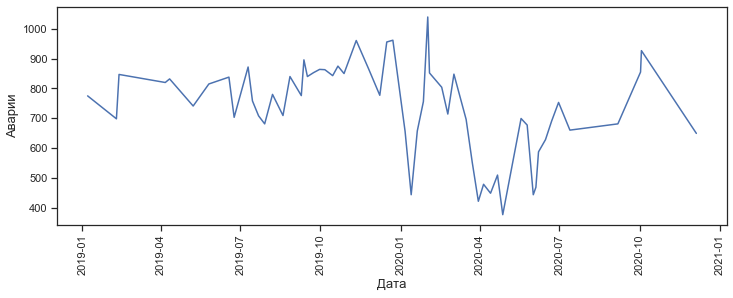

In [58]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})

ax = sns.lineplot(x='date_of', y='accidents', data=pdnumsqr)
ax.set_xlabel('Дата', fontsize = 13)
ax.set_ylabel('Аварии', fontsize = 13)


for label in ax.get_xticklabels():
    label.set_rotation(90) 

plt.show()

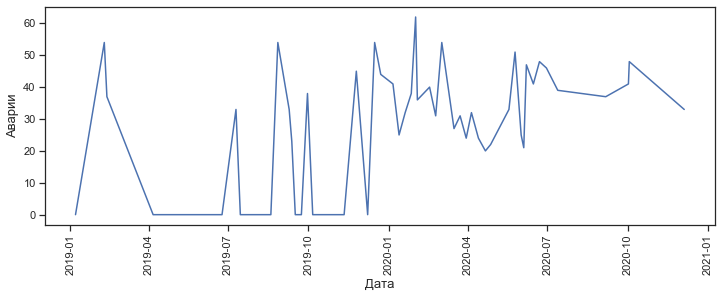

In [59]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(12,4)})
sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})

ax = sns.lineplot(x='date_of', y='victims', data=pdnumsqr)
ax.set_xlabel('Дата', fontsize = 13)
ax.set_ylabel('Аварии', fontsize = 13)


for label in ax.get_xticklabels():
    label.set_rotation(90) 

plt.show()

In [ ]:
pdnumsqr